# Fogify Demo

## Import FogifySDK, connect with controller, and import "fogified" `docker-compose` file

In [1]:
from FogifySDK import FogifySDK
fogify = FogifySDK("http://controller:5000", "docker-compose.yaml")

## Deploy the topology
While the system deploys the topology, a progress bar illustrates the current status.

In [2]:
fogify.deploy()

Deploy process: 100%|██████████| 6/6 [00:20<00:00,  3.36s/it]


{'message': "The services are deployed ( {'cloud-server': 1, 'mec-svc-1': 1, 'mec-svc-2': 1, 'car-workload-1': 2, 'car-workload-2': 1} )"}

## Retrieve the monitoring metrics from running instances
Fogify allows users to retrieve monitoring metrics in `pandas` dataframes.
The latter helps in depicting:

### Tables of values

In [3]:
fogify.get_metrics_from('mec-svc-1.1')

,count,memory_util,cpu,cpu_util,memory,network_rx_internet,network_tx_internet,network_rx_edge-net-1,network_tx_edge-net-1
timestamp,,,,,,,,,
2020-09-17 12:24:44,3,0.022070,1.030282e+09,0.000000,47394816.0,0.0,0.0,0.0,0.0
2020-09-17 12:24:51,4,0.022070,1.089237e+09,0.645380,47394816.0,0.0,0.0,0.0,0.0
2020-09-17 12:24:58,5,0.022375,1.681259e+09,5.587496,48050176.0,0.0,0.0,95342.0,80682.0
2020-09-17 12:25:03,6,0.022707,2.549128e+09,10.045213,48762880.0,1188.0,22516.0,176926.0,149736.0
2020-09-17 12:25:08,7,0.022732,2.973427e+09,6.034867,48816128.0,1188.0,22516.0,231297.0,195816.0


### Summaries

In [4]:
fogify.get_metrics_from('mec-svc-1.1').describe()

,count,memory_util,cpu,cpu_util,memory,network_rx_internet,network_tx_internet,network_rx_edge-net-1,network_tx_edge-net-1
count,6.000000,6.000000,6.000000e+00,6.000000,6.000000e+00,6.000000,6.000000,6.000000,6.000000
mean,5.500000,0.022471,2.145384e+09,4.827603,4.825634e+07,594.000000,11258.000000,136073.500000,115195.000000
std,1.870829,0.000351,1.038559e+09,3.831082,7.538539e+05,650.694398,12332.521105,127032.763972,107560.324118
min,3.000000,0.022070,1.030282e+09,0.000000,4.739482e+07,0.000000,0.000000,0.000000,0.000000
25%,4.250000,0.022146,1.237243e+09,1.880909,4.755866e+07,0.000000,0.000000,23835.500000,20170.500000
50%,5.500000,0.022541,2.115194e+09,5.811181,4.840653e+07,594.000000,11258.000000,136134.000000,115209.000000
75%,6.750000,0.022726,2.867353e+09,6.498215,4.880282e+07,1188.000000,22516.000000,217704.250000,184296.000000
max,8.000000,0.022873,3.548967e+09,10.045213,4.911923e+07,1188.000000,22516.000000,312876.000000,264936.000000


### Timelines

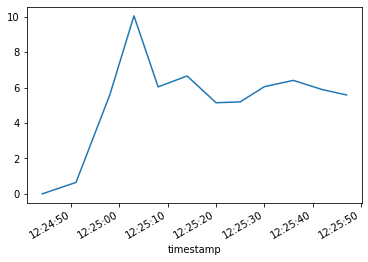

In [5]:
fogify.get_metrics_from('mec-svc-1.1').cpu_util.plot()

### Distributions

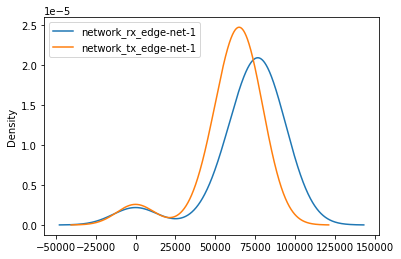

In [6]:
data = fogify.get_metrics_from('mec-svc-1.1')
data[['network_rx_edge-net-1', 'network_tx_edge-net-1']].diff().plot.kde()

### Scatter plots

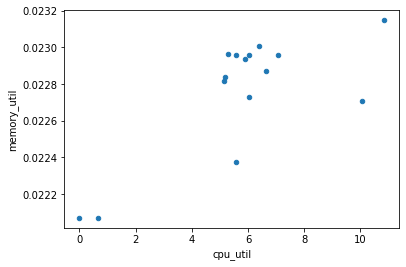

In [7]:
fogify.get_metrics_from('mec-svc-1.1').plot.scatter('cpu_util', 'memory_util')

## Ad-hoc Actions

With ad-hoc actions users are able to alternate the running fog topology. 
Specifically, they can inject network alterations, scaling actions, workload interfearences, and arbitrary commands.

For instance, the following method injects 25% `cpu` intensive workload on the `cloud-server` emulated instance for one minute duration (default).

In [8]:
fogify.stress('cloud-server.1', cpu=25)

{'message': 'OK'}

After that, lets retrive the cpu utilization to evaluate if the action was injected.

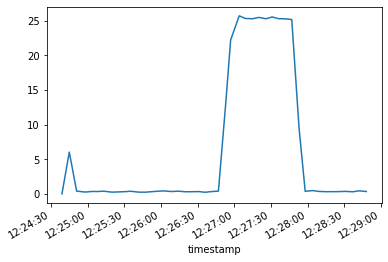

In [9]:
fogify.get_metrics_from('cloud-server.1').cpu_util.plot()

## Scenarios
A scenario is a sequence of timestamped actions that the Fogify will execute.
The scenarios are described in `docker-compose` file under the `scenarios` section.
To execute a scenario, Fogify requires only the scenario's name (at the following example `scenario_1`).

In [10]:
start, end = fogify.scenario_execution('scenario_1')

  0%|          | 0/130 [00:00<?, ?it/s]

Scenario execution process: 


 23%|██▎       | 30/130 [00:30<01:40,  1.00s/it]

The action network is executed.


 38%|███▊      | 50/130 [00:50<01:20,  1.00s/it]

The action network is executed.


 62%|██████▏   | 80/130 [01:21<00:50,  1.00s/it]

The action network is executed.


 77%|███████▋  | 100/130 [01:41<00:30,  1.00s/it]

The action network is executed.


100%|██████████| 130/130 [02:12<00:00,  1.02s/it]


The action  is executed.
Scenario is finished


## Scenarios analysis and more complex plot examples

After the scenario's execution users retrieve the generated data by filtering by scenario's time-range.
Furthermore, Fogify provides the timestamp of the events and a user are able to compine them.
In the following example, user retrieves the data of `mec-svc-1` service, generates the edge `network-out` and `network-in` timelines, 
and, also, depicts the timestamp ( *vertical lines* ) of the scenario's actions.

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
fig, ax = plt.subplots()

data = fogify.get_metrics_from('mec-svc-1.1')
data = data[data.index>start]
data = data[data.index<end]

data['network_tx_edge-net-1'].diff().plot(ax=ax,label="network-out")
data['network_rx_edge-net-1'].diff().plot(ax=ax,label="network-in")
ax.legend()
fogify.plot_annotations(ax, start=start, stop=end, colors_gist=['gray','darkgray', 'gray', 'black'])

Similarly, the user generates the CPU utilization plot of the first instance of `car-workload-1` service. 

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
fig, ax = plt.subplots()

data = fogify.get_metrics_from('car-workload-1.1')
data = data[data.index>start]
data = data[data.index<end]

data['cpu_util'].plot(ax=ax,label="cpu-utilization")
ax.legend()
fogify.plot_annotations(ax, start=start, stop=end, colors_gist=['gray','darkgray', 'gray', 'black'])

Moreover, the user generates a scatter plot ( *cpu utilization* vs *network traffic* of `mec-svc-1`)  with points only from the period of scenario execution.

In [ ]:
data = fogify.get_metrics_from('mec-svc-1.1')
data = data[data.index>start]
data = data[data.index<end]
data['network-edge'] = data['network_tx_edge-net-1'].diff() + data['network_rx_edge-net-1'].diff()
data.plot.scatter('cpu_util', 'network-edge' )

## Undeploy
Finally, the FogifySDK provides the `undeploy` method that destroys the emulated infrastructure.

In [ ]:
fogify.undeploy()